In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import seaborn as sns

from googletrans import Translator

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/home/otavio/ml/datasets/play-store/googleplaystore.csv')
data = data.drop(['Android Ver', 'Current Ver', 'Last Updated'], axis=1)
data.info()
data = data[data['Type'].notna()]
data = data[data['Type'] != '0']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
dtypes: float64(1), object(9)
memory usage: 847.1+ KB


In [3]:
d2 = data[data.groupby('Category')['App'].transform('size') > 300]
d2.Category.unique()

array(['BUSINESS', 'COMMUNICATION', 'FINANCE', 'HEALTH_AND_FITNESS',
       'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'PHOTOGRAPHY', 'SPORTS',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY'], dtype=object)

In [4]:
gt = Translator()
labels = d2.Category.unique()
labels = list(labels)
d = {}
for l in labels:
    d[l] = gt.translate(text=l.replace('_', ' '), src='en', dest='pt').text.upper()
d['BUSINESS'] = 'NEGÓCIOS'

In [5]:
d2['Category'] = d2['Category'].apply(lambda x: d[x])
d2['Category']

/home/otavio/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


187            NEGÓCIOS
188            NEGÓCIOS
189            NEGÓCIOS
190            NEGÓCIOS
191            NEGÓCIOS
              ...      
10835          NEGÓCIOS
10836           FAMÍLIA
10837           FAMÍLIA
10838            MÉDICO
10840    ESTILO DE VIDA
Name: Category, Length: 7892, dtype: object

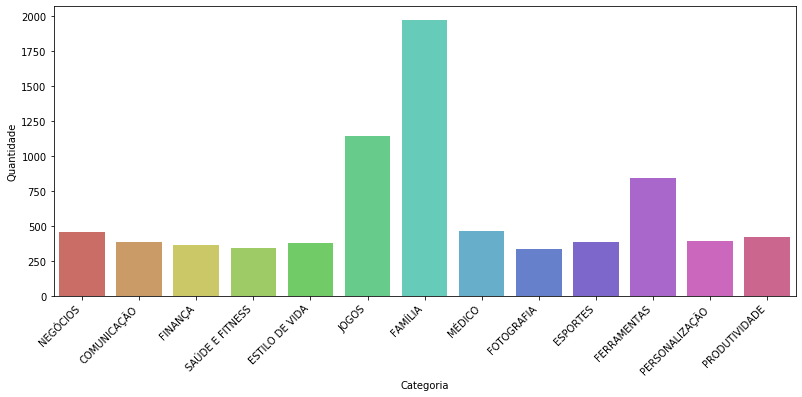

In [6]:
plt.figure(figsize=(11.25,5.625))
fig = sns.countplot(x=d2['Category'], palette="hls", orient='h')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
fig.set(xlabel='Categoria', ylabel='Quantidade')
plt.tight_layout()
fig.get_figure().savefig('out.png')

In [7]:
d = {'Paid': 'Pago', 'Free': 'Gratuito'}
data['Type'] = data['Type'].apply(lambda x: d[x])
data['Type']

0        Gratuito
1        Gratuito
2        Gratuito
3        Gratuito
4        Gratuito
           ...   
10836    Gratuito
10837    Gratuito
10838    Gratuito
10839    Gratuito
10840    Gratuito
Name: Type, Length: 10839, dtype: object

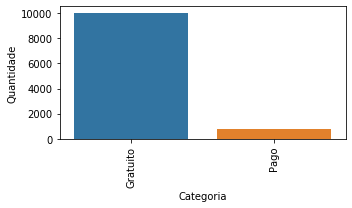

In [8]:
plt.figure(figsize=(5,3))
fig = sns.countplot(x=data['Type'])
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
fig.set(xlabel='Categoria', ylabel='Quantidade')
plt.tight_layout()
fig.get_figure().savefig('out2.png')

In [16]:
d3 = data[data['Category'] == 'FAMILY']
d3['Installs'] = d3['Installs'].apply(lambda x: int(x.replace('+', '').replace(',', '')))
soma = d3['Installs'].sum()
soma

/home/otavio/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


10258263505

In [18]:
d3 = d3.sort_values('Installs')
d3.tail(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
4229,Where's My Water? Free,FAMILY,4.4,1372013,57M,100000000,Gratuito,0,Everyone,Puzzle;Brain Games
2216,Duolingo: Learn Languages Free,FAMILY,4.7,6294397,Varies with device,100000000,Gratuito,0,Everyone,Education;Education
4257,Cut the Rope FULL FREE,FAMILY,4.4,2122705,49M,100000000,Gratuito,0,Everyone,Puzzle
3930,Flow Free,FAMILY,4.3,1295293,11M,100000000,Gratuito,0,Everyone,Puzzle
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Gratuito,0,Everyone 10+,Adventure;Action & Adventure
3889,Netflix,FAMILY,4.4,5453997,Varies with device,100000000,Gratuito,0,Teen,Entertainment
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71M,100000000,Gratuito,0,Everyone,Casual
4247,Talking Tom Cat,FAMILY,4.3,1838090,Varies with device,100000000,Gratuito,0,Everyone 10+,Casual
3975,Hay Day,FAMILY,4.5,10053186,94M,100000000,Gratuito,0,Everyone,Casual
3910,My Talking Angela,FAMILY,4.5,9876369,99M,100000000,Gratuito,0,Everyone,Casual
